<a href="https://colab.research.google.com/github/Valepowell/ML_Prediccion_Calidad_Vino/blob/main/Predicci%C3%B3n_de_Calidad_del_Vino_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga y Exploración de Datos:

- Cargar el dataset y revisar su estructura básica.
- Describir las variables y su distribución.
- Identificar y tratar valores nulos y outliers.

In [55]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/BBDD/WineQT.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [58]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [59]:
df.shape

(1143, 13)

In [60]:
df.head(20)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [61]:
# Estadísticas básicas
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile acidity,1143.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric acid,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual sugar,1143.0,3.0,1.0,1.0,2.0,2.0,3.0,16.0
chlorides,1143.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free sulfur dioxide,1143.0,16.0,10.0,1.0,7.0,13.0,21.0,68.0
total sulfur dioxide,1143.0,46.0,33.0,6.0,21.0,37.0,61.0,289.0
density,1143.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,1143.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1143.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


In [62]:
# Verificar valores nulos
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [63]:
# Revisamos duplicados
df.duplicated().sum()

np.int64(0)

In [64]:
df = df.drop(columns=['Id'])

# 2. Preprocesamiento de Datos:

- Seleccionar características importantes para la clasificación.
- Transformar variables categóricas en variables numéricas si es necesario.
- Dividir los datos en conjuntos de entrenamiento y prueba.
- Escalar las características.

In [65]:
X = df.drop(columns=['quality'])
y = df['quality']

In [66]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [67]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1138,6
1139,6
1140,5
1141,6


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Entrenamiento de Modelos de Clasificación:

- Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, - RandomForest, y Regresión Logística).
- Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

**KNN**

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Definir parámetros a buscar
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# GridSearchCV con validación cruzada
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_
print("Mejor KNN:", grid_knn.best_params_)

Mejor KNN: {'n_neighbors': 7, 'weights': 'distance'}


**RandomForest**

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Definir parámetros a buscar
param_grid_rf = {
    'n_estimators': [100, 200]
}

# GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_
print("Mejor Random Forest:", grid_rf.best_params_)

Mejor Random Forest: {'n_estimators': 100}


**Regresión Logistica**

In [71]:
from sklearn.linear_model import LogisticRegression

# Definir parámetros
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)

best_lr = grid_lr.best_estimator_
print("Mejor Logistic Regression:", grid_lr.best_params_)

Mejor Logistic Regression: {'C': 1, 'solver': 'lbfgs'}


# 4. Evaluación de Modelos:

- Evaluar los modelos utilizando métricas como exactitud, precisión, recall, - - F1-Score y matriz de confusión.
- Generar un informe de clasificación para cada modelo.
- Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.


 KNN
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.64      0.75      0.69        96
           6       0.59      0.56      0.57        99
           7       0.45      0.35      0.39        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.33      0.33       229
weighted avg       0.57      0.59      0.58       229



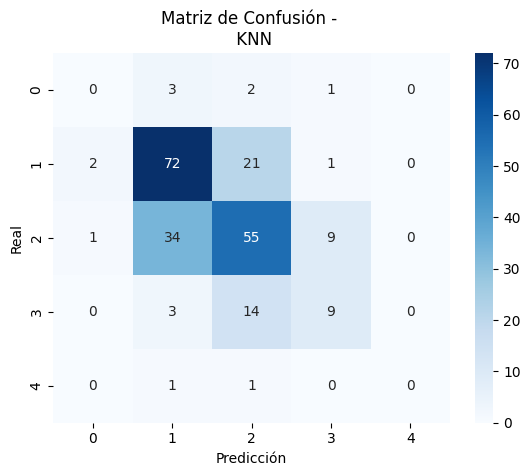


 Random Forest
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229



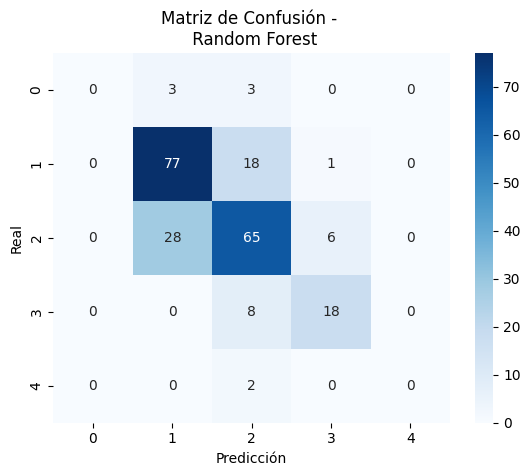


 Regresión Logística
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.62      0.64      0.63        99
           7       0.48      0.42      0.45        26
           8       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.36      0.36      0.36       229
weighted avg       0.61      0.63      0.62       229



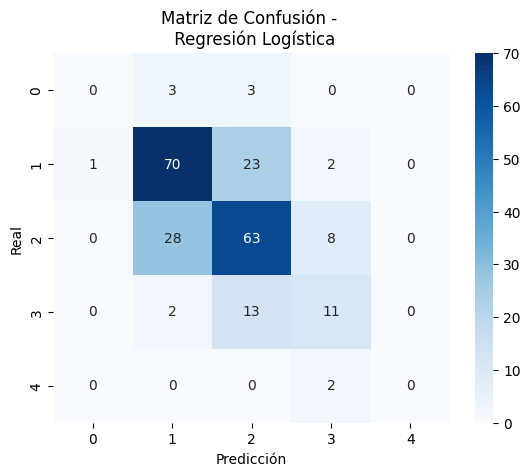

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"{nombre}")
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Evaluar todos
evaluar_modelo("\n KNN", best_knn, X_test_scaled, y_test)
evaluar_modelo("\n Random Forest", best_rf, X_test_scaled, y_test)
evaluar_modelo("\n Regresión Logística", best_lr, X_test_scaled, y_test)

# 5. Análisis y Comparación de Resultados:

- Comparar el rendimiento de los diferentes modelos.
- Discutir cuál modelo ofrece el mejor rendimiento y por qué.
- Identificar las fortalezas y debilidades de cada enfoque en este contexto.

## Análisis y Comparación de Resultados

Tras evaluar los modelos KNN, Random Forest y Regresión Logística en el conjunto de prueba escalado, podemos observar las siguientes métricas de rendimiento:

*   **KNN (con n_neighbors=7 y weights='distance'):**
    *   Precisión ponderada: 0.57
    *   Recall ponderado: 0.59
    *   Puntuación F1 ponderada: 0.58
    *   El reporte de clasificación muestra que el modelo tiene dificultades para predecir las clases minoritarias (calidad 4 y 8), donde la precisión, recall y F1-score son 0.0. Para las clases 5, 6 y 7, el rendimiento es mejor, especialmente para la clase 5.
    *   La matriz de confusión confirma que hay varias predicciones incorrectas, especialmente entre las clases 5 y 6.

*   **Random Forest (con n_estimators=100):**
    *   Precisión ponderada: 0.67
    *   Recall ponderado: 0.70
    *   Puntuación F1 ponderada: 0.68
    *   Este modelo muestra un rendimiento general superior a KNN y Regresión Logística. Aunque también tiene problemas con las clases minoritarias 4 y 8, su rendimiento en las clases 5, 6 y 7 es notablemente mejor en comparación con KNN y Regresión Logística, con mayores valores de precisión, recall y F1-score.
    *   La matriz de confusión indica menos errores de clasificación en comparación con los otros modelos.

*   **Regresión Logística (con C=1 y solver='lbfgs'):**
    *   Precisión ponderada: 0.61
    *   Recall ponderado: 0.63
    *   Puntuación F1 ponderada: 0.62
    *   El rendimiento de la Regresión Logística es intermedio entre KNN y Random Forest. Al igual que los otros modelos, no predice correctamente las clases 4 y 8. Su rendimiento en las clases 5, 6 y 7 es similar al de KNN en algunos aspectos, pero ligeramente mejor en general en cuanto a la precisión y recall ponderados.
    *   La matriz de confusión muestra un patrón de errores de clasificación similar al de KNN, con confusiones entre las clases 5 y 6.

**Discusión y Fortalezas/Debilidades:**

Considerando las métricas ponderadas (accuracy, precision, recall, F1-score), el modelo **Random Forest** ofrece el mejor rendimiento general en este conjunto de datos. Sus fortalezas radican en su capacidad para manejar la complejidad de los datos y capturar relaciones no lineales, lo que se refleja en mejores métricas para las clases mayoritarias.

Las debilidades de todos los modelos evaluados se centran en su incapacidad para predecir correctamente las clases minoritarias (calidad 4 y 8). Esto es un problema común en conjuntos de datos con clases desequilibradas. Para mejorar la predicción de estas clases, se podrían considerar técnicas de manejo de desbalance de clases (como sobremuestreo de clases minoritarias o submuestreo de clases mayoritarias), o enfoques de modelado específicos para datos desequilibrados.

En resumen, Random Forest es el modelo más prometedor de los tres para esta tarea de clasificación de calidad de vino, aunque se debe abordar el desafío de las clases minoritarias para mejorar aún más el rendimiento general del modelo.